In [ ]:
import cv2
import psycopg2
from PIL import Image
import pandas as pd
from imgbeddings import imgbeddings
from IPython.display import display

In [3]:
alg = "haarcascade_frontalface_default.xml"
# passing the algorithm to OpenCV
haar_cascade = cv2.CascadeClassifier(alg)

In [4]:
cabinets = ['abe']

In [5]:
# 画像のリストを空の配列で
face_files = []

In [6]:
# 内閣の画像から顔を取得して保存
for name in cabinets:
    original_file_name = 'images/cabinet/' + name + '.jpg'
    img = cv2.imread(original_file_name, 0)
    # creating a black and white version of the image
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=10, minSize=(50, 50))
    i = 0
    for x, y, w, h in faces:
        # crop the image to select only the face
        cropped_image = img[y : y + h, x : x + w]
        # loading the target image path into target_file_name variable
        target_file_name = 'images/faces/' + name + str(i) + '.jpg'
        cv2.imwrite(
            target_file_name,
            cropped_image,
        )
        face_files.append({
            'file_name': target_file_name,
            'original_file_name': original_file_name
        })
        i += 1

In [25]:
# 画像のベクトルを取得してデータベースへ保存
ibed = imgbeddings()
conn = psycopg2.connect('dbname=app user=default password=secret host=db')
cur = conn.cursor()
for face_file in face_files:
    img = Image.open(face_file['file_name'])
    embedding = ibed.to_embeddings(img)[0]
    cur.execute(
        "INSERT INTO faces (original_file_name, file_name, embedding) VALUES (%s, %s, %s)",
        (face_file['original_file_name'], face_file['file_name'], embedding.tolist())
    )
    print (face_file['file_name'])
conn.commit()
conn.close()

/opt/conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:678: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/transformers/models/clip/processing_clip.py:144: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


images/faces/abe0.jpg
images/faces/abe1.jpg
images/faces/abe2.jpg
images/faces/abe3.jpg
images/faces/abe4.jpg
images/faces/abe5.jpg
images/faces/abe6.jpg
images/faces/abe7.jpg
images/faces/abe8.jpg
images/faces/abe9.jpg
images/faces/abe10.jpg
images/faces/abe11.jpg
images/faces/abe12.jpg
images/faces/abe13.jpg
images/faces/abe14.jpg
images/faces/abe15.jpg
images/faces/abe16.jpg
images/faces/abe17.jpg
images/faces/abe18.jpg
images/faces/abe19.jpg
images/faces/abe20.jpg
images/faces/abe21.jpg
images/faces/abe22.jpg
images/faces/abe23.jpg
images/faces/abe24.jpg
images/faces/abe25.jpg
images/faces/abe26.jpg
images/faces/abe27.jpg
images/faces/abe28.jpg
images/faces/abe29.jpg
images/faces/abe30.jpg
images/faces/abe31.jpg
images/faces/abe32.jpg
images/faces/abe33.jpg


In [8]:
search_img = cv2.imread('images/asou-tarou.jpg', 0)
gray_search_img = cv2.cvtColor(search_img, cv2.COLOR_RGB2BGR)

In [9]:
search_faces = haar_cascade.detectMultiScale(gray_search_img, scaleFactor=1.1, minNeighbors=10, minSize=(50, 50))

In [10]:
(x, y, w, h) = search_faces[0]
cropped_image = search_img[y: y + h, x: x + w]

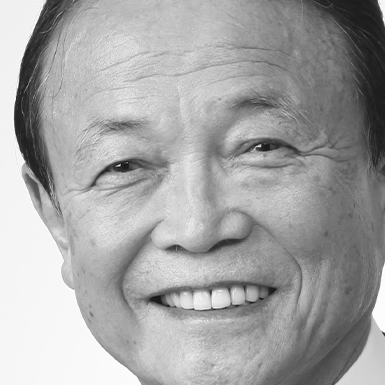

In [11]:
pil_img = Image.fromarray(cropped_image)
display(pil_img)

In [12]:
embedding = ibed.to_embeddings(pil_img)[0]

In [13]:
conn = psycopg2.connect('dbname=app user=default password=secret host=db')
cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

In [14]:
vector_string = "["
for x in embedding.tolist():
    vector_string += str(x) + ","
vector_string = vector_string[:-1] + "]"

In [21]:
cur.execute(
    "SELECT id, original_file_name, file_name , embedding <-> %s as distance, embedding <=> %s as cos_similarity, embedding <#> %s as inner_product FROM faces ORDER BY distance DESC LIMIT 20;",
    (vector_string,vector_string,vector_string)
)

In [22]:
dict_result = []
rows = cur.fetchall()
for row in rows:
    dict_result.append(dict(row))

In [23]:
pd.DataFrame(dict_result)

,id,original_file_name,file_name,distance,cos_similarity,inner_product
0,91,images/cabinet/abe.jpg,images/faces/abe22.jpg,25.333320,0.465484,-364.892822
1,59,images/cabinet/abe.jpg,images/faces/abe24.jpg,25.333320,0.465484,-364.892822
2,99,images/cabinet/abe.jpg,images/faces/abe30.jpg,24.789032,0.470138,-345.382629
3,65,images/cabinet/abe.jpg,images/faces/abe30.jpg,24.789032,0.470138,-345.382629
4,35,images/cabinet/abe.jpg,images/faces/abe0.jpg,24.598352,0.453492,-362.767395
5,69,images/cabinet/abe.jpg,images/faces/abe0.jpg,24.598352,0.453492,-362.767395
6,88,images/cabinet/abe.jpg,images/faces/abe19.jpg,23.312833,0.407951,-392.294098
7,55,images/cabinet/abe.jpg,images/faces/abe20.jpg,23.312833,0.407951,-392.294098
8,43,images/cabinet/abe.jpg,images/faces/abe8.jpg,22.948440,0.402305,-389.973511
9,77,images/cabinet/abe.jpg,images/faces/abe8.jpg,22.948440,0.402305,-389.973511


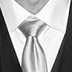

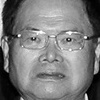

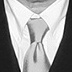

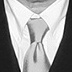

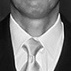

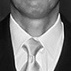

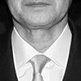

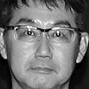

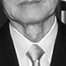

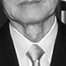

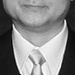

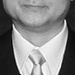

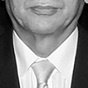

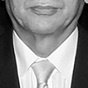

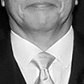

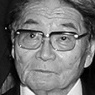

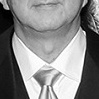

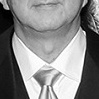

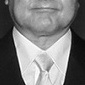

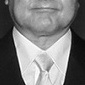

In [24]:
for row in dict_result:
    img = Image.open(row['file_name'])
    display(img)